In [1]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import pandas as pd
from yikit.models import Objective
import optuna

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target)
display(X, y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [3]:
SEED = 334

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2, stratify=y)

ベンチマーク

In [5]:
estimator = RidgeClassifier(random_state=SEED)
accuracy_score(estimator.fit(X_train, y_train).predict(X_test), y_test)

0.9649122807017544

ハイパーパラメータ探索

In [6]:
def custom_params(trial):
    return {
        'alpha': trial.suggest_loguniform('alpha', 1e-2, 1e2),
        'normalize': trial.suggest_int('normalize', 0, 1)
    }

In [7]:
kf = StratifiedKFold(n_splits=4, shuffle=False)
objective = Objective(clone(estimator), X_train, y_train, custom_params, cv=kf, random_state=SEED, scoring='accuracy', n_jobs=-1)

In [8]:
study = optuna.create_study(sampler=objective.sampler, direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=1)

[I 2021-08-09 00:10:43,041] A new study created in memory with name: no-name-7d899923-e7bc-453b-a664-a2a978c5a70d
[I 2021-08-09 00:10:43,934] Trial 0 finished with value: 0.9538697407234902 and parameters: {'alpha': 0.2860155382149992, 'normalize': 0}. Best is trial 0 with value: 0.9538697407234902.
[I 2021-08-09 00:10:44,266] Trial 1 finished with value: 0.9538697407234902 and parameters: {'alpha': 0.31188595896884447, 'normalize': 0}. Best is trial 0 with value: 0.9538697407234902.
[I 2021-08-09 00:10:44,277] Trial 2 finished with value: 0.9406730321378668 and parameters: {'alpha': 28.395638076045163, 'normalize': 0}. Best is trial 0 with value: 0.9538697407234902.
[I 2021-08-09 00:10:44,606] Trial 3 finished with value: 0.6417481757491073 and parameters: {'alpha': 99.46112002904165, 'normalize': 1}. Best is trial 0 with value: 0.9538697407234902.
[I 2021-08-09 00:10:44,616] Trial 4 finished with value: 0.9538697407234901 and parameters: {'alpha': 1.0915704771077213, 'normalize': 0}.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Trials', ylabel='Objective Values'>)

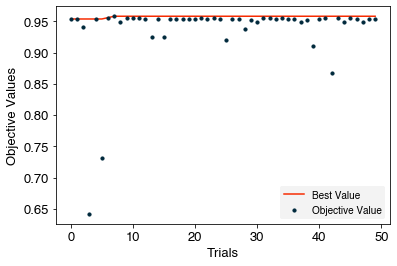

In [9]:
from yikit.tools import get_learning_curve
get_learning_curve(study=study)

In [10]:
estimator_opt = clone(estimator).set_params(**study.best_params, **objective.fixed_params_)
accuracy_score(estimator_opt.fit(X_train, y_train).predict(X_test), y_test)

0.9824561403508771

In [11]:
estimator_opt, estimator

(RidgeClassifier(alpha=0.015936234610515895, normalize=1, random_state=334),
 RidgeClassifier(random_state=334))